In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Problem-1

#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/WHR-2024-5CS037.csv')

#Displaying the first 10 rows
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [5]:
#Identifying the number of rows and columns in the dataset
print("Number of rows in WHR dataset :",df.shape[0])
print("Number of columnsin WHR dataset :",df.shape[1])


Number of rows in WHR dataset : 143
Number of columnsin WHR dataset : 9


In [6]:
#Listing all columns and their data types
print("Columns and datatypes:\n")
df.dtypes

Columns and datatypes:



,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [7]:
#Calculating the mean, median, and standard deviation for the Score column
mean_of_score = df['score'].mean()
median_of_score = df['score'].median()
std_of_score = df['score'].std()

#Displaying the mean,median and standard deviation of score column
print("Mean of Score:",mean_of_score)
print("Median of Score:",median_of_score)
print("Standard Deviation of Score:",std_of_score)

Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [8]:
#Identifing the country with the highest and lowest happiness scores
highest_happiness_score = df.loc[df['score'].idxmax()][['Country name','score']]
lowest_happiness_score = df.loc[df['score'].idxmin()][['Country name','score']]

print(f"Country with the highest happiness score: {highest_happiness_score['Country name']} ({highest_happiness_score['score']})")
print(f"Country with the lowest happiness score: {lowest_happiness_score['Country name']} ({lowest_happiness_score['score']})")

Country with the highest happiness score: Finland (7.741)
Country with the lowest happiness score: Afghanistan (1.721)


In [9]:
#Checking if there are any missing values in the dataset.
#If so, displaying the total count for each column.
missing_values = df.isnull().sum()
print("Missing Values:\n")
missing_values

Missing Values:



,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [10]:
#Filtering the dataset to show only the countries with a Score greater than 7.5
score_greater_than_sevenPointFive = df[df['score'] > 7.5]
print("Countries with a Score greater than 7.5:\n")
score_greater_than_sevenPointFive[['Country name','score']]

Countries with a Score greater than 7.5:



,Country name,score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525


In [11]:
#Sorting the dataset by GDP per Capita in descending order
sorting_by_GDP_per_capita = score_greater_than_sevenPointFive.sort_values(by='Log GDP per capita',ascending=False)

#Displaying the top 10 rows
print("Countries with Score greater than 7.5 sorted by GDP per Capita:")
sorting_by_GDP_per_capita.head(10)

Countries with Score greater than 7.5 sorted by GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [12]:
# Adding a Happiness Category column and using lambda to categorize countries based on their score
df['Happiness Category'] = df['score'].apply(lambda score: "Low" if score < 4 else "Medium" if 4 <= score <= 6 else "High")
print("Happiness Category added to dataset:\n")
df[['Country name','score','Happiness Category']]


Happiness Category added to dataset:



,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


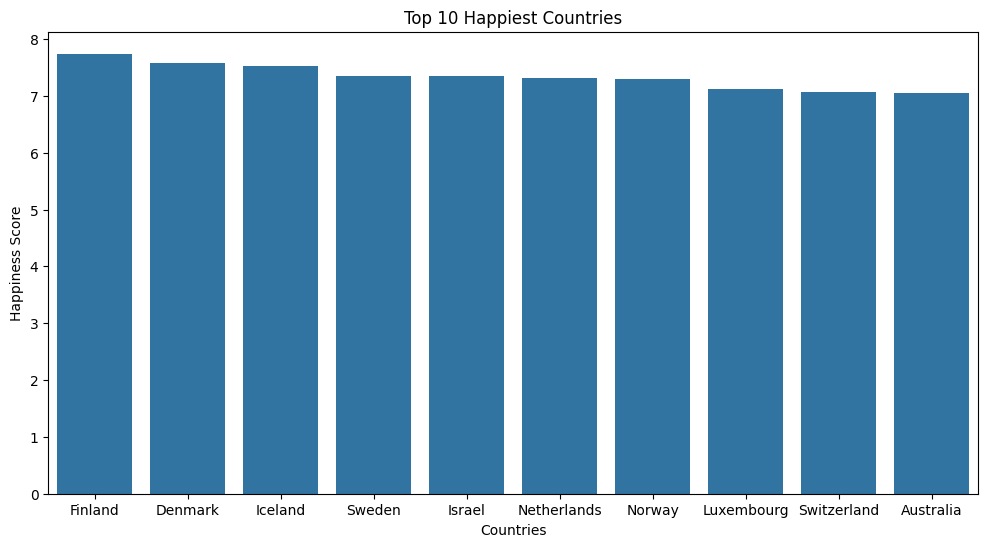

In [13]:
#Bar plot to plot the top 10 happiest countries by Score
top_10_happiest_countries = df.nlargest(10, 'score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest_countries)
plt.title("Top 10 Happiest Countries")
plt.xlabel("Countries")
plt.ylabel("Happiness Score")
plt.show()

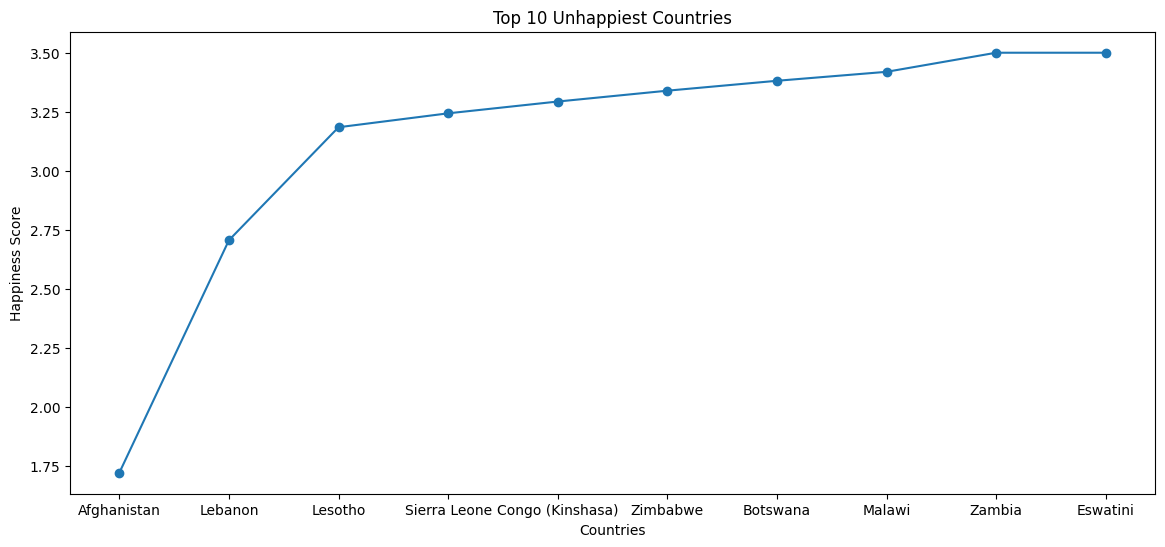

In [15]:
#Line plot to plot the top 10 happiest countries by Score
top_10_unhappiest_countries = df.nsmallest(10, 'score')
plt.figure(figsize=(14, 6))
plt.plot(top_10_unhappiest_countries['Country name'], top_10_unhappiest_countries['score'], marker='o')
plt.title("Top 10 Unhappiest Countries")
plt.xlabel("Countries")
plt.ylabel("Happiness Score")
plt.show()

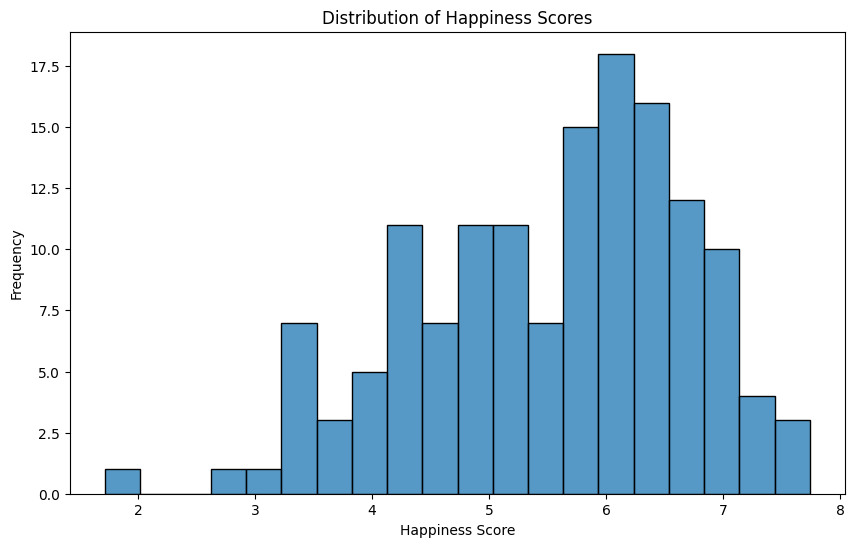

In [16]:
#Ploting histogram of score column to show distribution and  interpretation
plt.figure(figsize=(10, 6))
sns.histplot(df['score'],bins=20)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

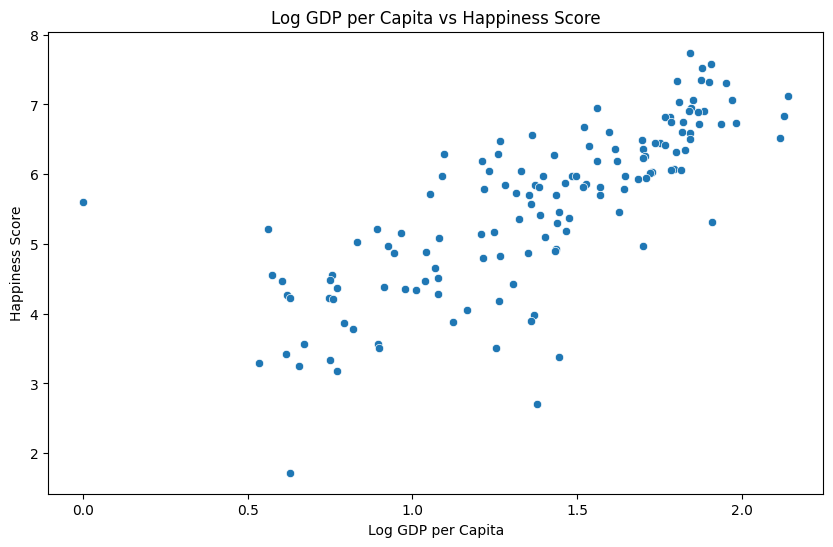

In [17]:
#Scatter plot between GDP per Capita and score to vsualize their relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df)
plt.title("Log GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

In [82]:
#Problem-2
#Setup Task

#Making a list of south asian countries and filtering according to it
south_asian_countries =  ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asian_countries_df = df[df['Country name'].isin(south_asian_countries)]
south_asian_countries_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [83]:
#Saving the new dataframe into csv
south_asian_countries_df.to_csv('south_asian_countries_df.csv', index=False)
print("Data has been saved to south_asian_countries_df.csv")

Data has been saved to south_asian_countries_df.csv


In [84]:
#Composite Score Ranking

#Creating new column Composite Score and filling it
south_asian_countries_df.loc[:,'Composite Score'] = (0.40 * south_asian_countries_df['Log GDP per capita'] + 0.30 * south_asian_countries_df['Social support'] +0.30 * south_asian_countries_df['Healthy life expectancy'])
south_asian_countries_df[['Country name','Composite Score']]

<ipython-input-84-b57825546183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_countries_df.loc[:,'Composite Score'] = (0.40 * south_asian_countries_df['Log GDP per capita'] + 0.30 * south_asian_countries_df['Social support'] +0.30 * south_asian_countries_df['Healthy life expectancy'])


,Country name,Composite Score
92,Nepal,0.8159
107,Pakistan,0.7039
125,India,0.7874
127,Sri Lanka,1.0739
128,Bangladesh,0.6774
142,Afghanistan,0.3238


In [85]:
#Sorting according to Composite Score in descending order
sorting_by_composite_score = south_asian_countries_df.sort_values(by='Composite Score', ascending=False)
sorting_by_composite_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


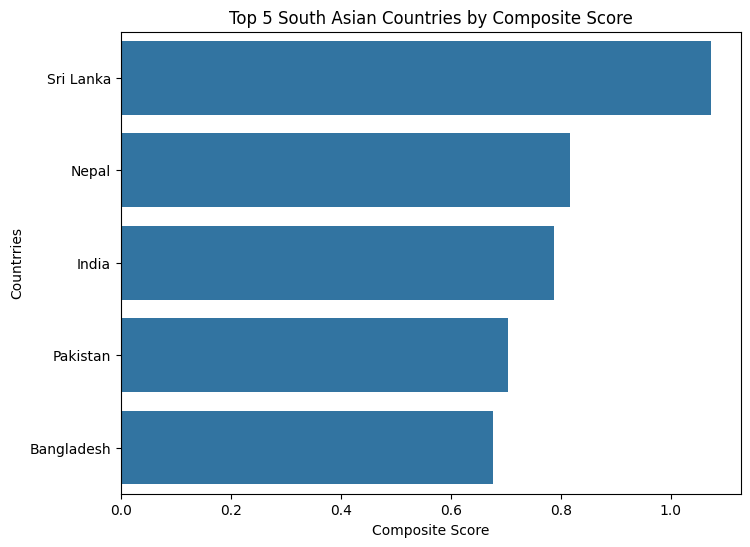

In [88]:
#Making a horizontal bar chart of the top 5 countries by Composite Score
top_five_composite_scores = sorting_by_composite_score.head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_five_composite_scores)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Countrries')
plt.show()

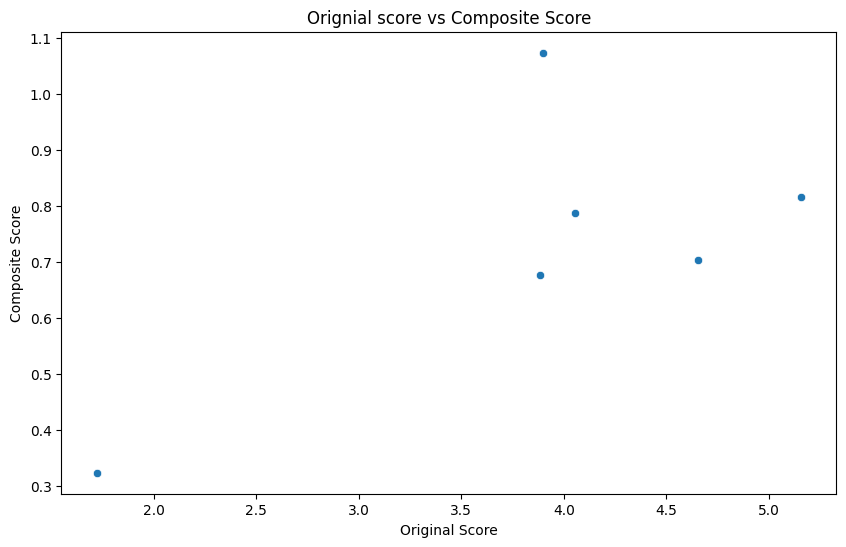

In [90]:
#Looking at the ranking according to the composite score and orginal score
#Scatter plot between composite score and orginal score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asian_countries_df)
plt.title("Orignial score vs Composite Score")
plt.xlabel("Original Score")
plt.ylabel("Composite Score")
plt.show()

In [24]:
#Outlier Detection

#Finding the IQR of Score and GDP per capita
q1_score_of_south_asian_countries = south_asian_countries_df['score'].quantile(0.25)
q3_score_of_south_asian_countries = south_asian_countries_df['score'].quantile(0.75)
IOR_of_score_of_south_asian_countries = q3_score_of_south_asian_countries - q1_score_of_south_asian_countries

q1_gdp_of_south_asian_countries = south_asian_countries_df['Log GDP per capita'].quantile(0.25)
q3_gdp_of_south_asian_countries = south_asian_countries_df['Log GDP per capita'].quantile(0.75)
IQR_of_gdp_of_south_asian_countries = q3_gdp_of_south_asian_countries - q1_gdp_of_south_asian_countries

In [25]:
#Finding the outliers using the 1.5 * IQR rule
#Find the upper and lower bound,if the condition is meet it is outlier
outliers_score = (south_asian_countries_df['score'] < (q1_score_of_south_asian_countries - 1.5 * IOR_of_score_of_south_asian_countries)) | (south_asian_countries_df['score'] > (q3_score_of_south_asian_countries + 1.5 * IOR_of_score_of_south_asian_countries))
outliers_gdp = (south_asian_countries_df['Log GDP per capita']< (q1_gdp_of_south_asian_countries - 1.5 * IQR_of_gdp_of_south_asian_countries)) | (south_asian_countries_df['Log GDP per capita'] > (q3_gdp_of_south_asian_countries + 1.5 * IQR_of_gdp_of_south_asian_countries))

# Combine the outliers for both score and GDP per Capita
outliers = outliers_score | outliers_gdp

outlier_countries = south_asian_countries_df[outliers]
print("Outlier Countries Based on Score and GDP per Capita:\n")
outlier_countries[['Country name', 'score', 'Log GDP per capita']]

Outlier Countries Based on Score and GDP per Capita:



,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


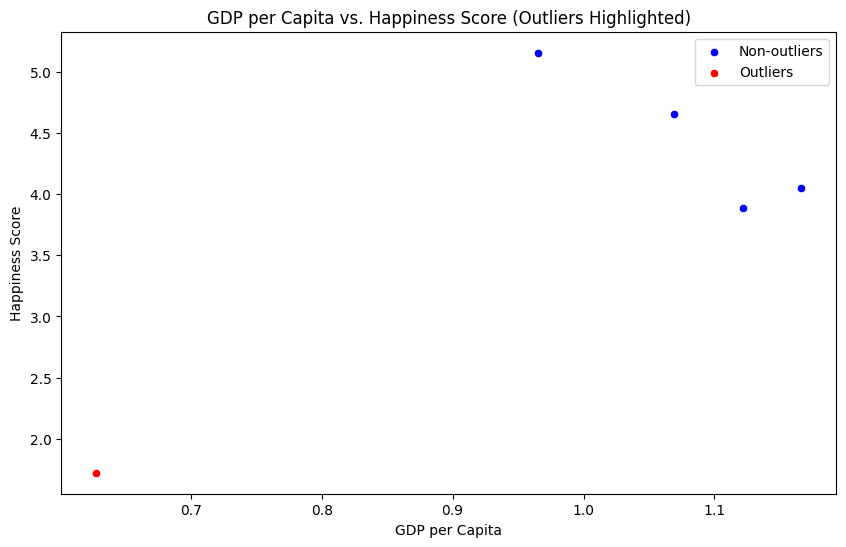

In [26]:
#Scatter plot with outliers highlighted in red
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_countries_df, label='Non-outliers', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outlier_countries, label='Outliers', color='red')
plt.title("GDP per Capita vs. Happiness Score (Outliers Highlighted)")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

#Seeing the outliers we can determine that some values in the catagories are extermly high or extremly low
#This can cause significant skew in the regional average of south asia in the three catagories

In [27]:
#Exploring Trends Across Metrics

#Finding the corelation of Freedom of make life choice and Generosity with score
correlation_freedom_of_life_choice = south_asian_countries_df['score'].corr(south_asian_countries_df['Freedom to make life choices'])
correlation_generosity = south_asian_countries_df['score'].corr(south_asian_countries_df['Generosity'])

print("Correlation between Freedom to make life choices and Score:",correlation_freedom_of_life_choice)
print("Correlation between Generosity and Score:",correlation_generosity)

#They both have a strong correlation with generosity being slightly stronger

Correlation between Freedom to make life choices and Score: 0.801497903141921
Correlation between Generosity and Score: 0.8773326267276358


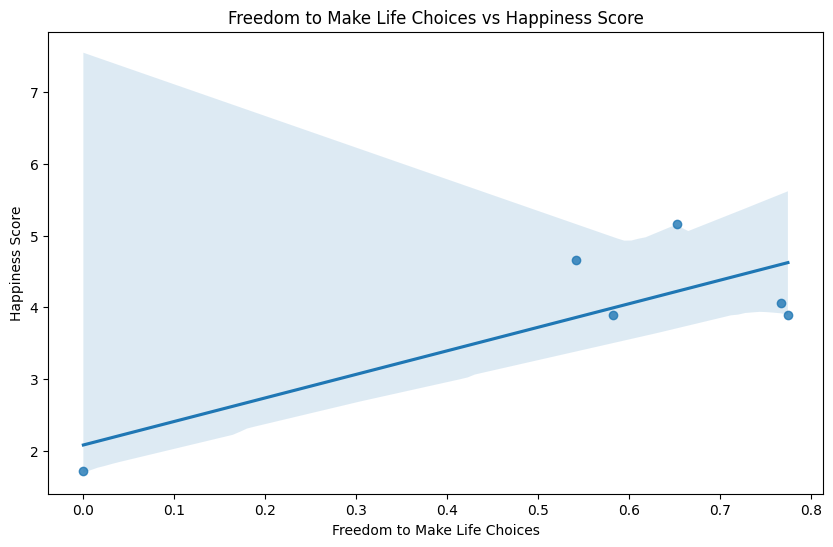

In [107]:
#Scatter plot for Freedom to Make Life Choices vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_countries_df)
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()


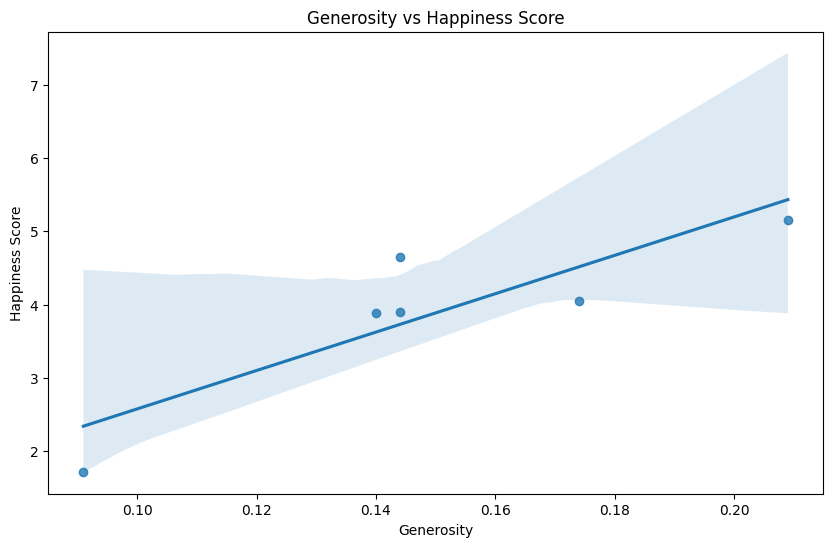

In [106]:
#Scatter plot for Generosity vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_countries_df)
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

In [110]:
#Gap Analysis

#Adding a new column GDP-Score Gap for each South Asian country
south_asian_countries_df.loc[:,'GDP-Score Gap'] = south_asian_countries_df['Log GDP per capita'] - south_asian_countries_df['score']
south_asian_countries_df[['Country name','GDP-Score Gap']]

<ipython-input-110-8b010f7add71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_countries_df.loc[:,'GDP-Score Gap'] = south_asian_countries_df['Log GDP per capita'] - south_asian_countries_df['score']


,Country name,GDP-Score Gap
92,Nepal,-4.193
107,Pakistan,-3.588
125,India,-2.888
127,Sri Lanka,-2.537
128,Bangladesh,-2.764
142,Afghanistan,-1.093


In [111]:
#South asian countries by GDP-Score Gap in ascending order
ascending_gap = south_asian_countries_df.sort_values('GDP-Score Gap', ascending=True)
ascending_gap.head()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537


In [112]:
#South asian countries by GDP-Score Gap in descending order
descending_gap = south_asian_countries_df.sort_values('GDP-Score Gap', ascending=False)
descending_gap.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588


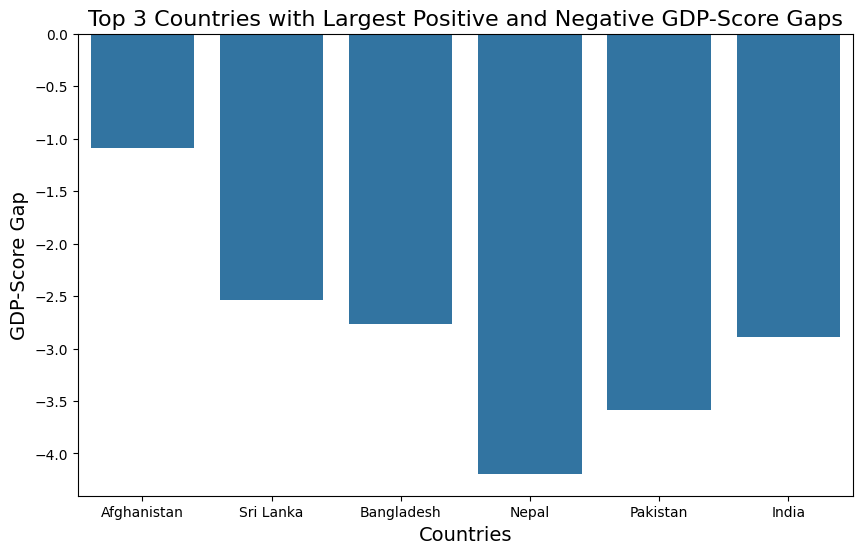

In [113]:
#Getting the top 3 positive and negative gap
top_3_largest_positive_gap = descending_gap.head(3)
top_3_largest_negative_gap = ascending_gap.head(3)

# Combine the top 3 positive and negative gaps into one DataFrame for bar chart
top_gaps = pd.concat([top_3_largest_positive_gap, top_3_largest_negative_gap])

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_gaps)
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps', fontsize=16)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('GDP-Score Gap', fontsize=14)
plt.show()

In [34]:
#Seeing the above bar chart we can see that Nepal's happiness score is higher than its GDP
#In other words Nepalease citizens are happier than expected based on their income

#Seeing the above chart we can see that Afganistan has a gdp score higher than their happiness
#in other words Afgani people are less happier than expected based on their income

#The reason behined this difference might be in their income inequality,lack of social supoort and poor quality of life.
#These give us a understanding if the economic growth in these countries is equaling to more happy citizens.

In [115]:
#Problem-3

#Setup Task

#Making a list of middle eastern countries and filtering according to it
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

middle_east_countries_df = df[df['Country name'].isin(middle_east_countries)]
middle_east_countries_df


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [36]:
#Descriptive Statistics

south_asian_countries_df_score_mean = south_asian_countries_df['score'].mean()
south_asian_countries_df_score_standard_deviation= south_asian_countries_df['score'].std()

middle_east_countries_df_score_mean = middle_east_countries_df['score'].mean()
middle_east_countries_df_score_standard_deviation = middle_east_countries_df['score'].std()

print("South Asia Score Mean:", south_asian_countries_df_score_mean)
print("South Asia Score Standard Deviation:", south_asian_countries_df_score_standard_deviation)
print("\n")
print("Middle East Score Mean :", middle_east_countries_df_score_mean)
print("Middle East Score Standard Deviation:", middle_east_countries_df_score_standard_deviation)


South Asia Score Mean: 3.8952000000000004
South Asia Score Standard Deviation: 1.3160025455902433


Middle East Score Mean : 5.412100000000001
Middle East Score Standard Deviation: 1.5662011684327144


In [37]:
#Finding which region has higher happiness Scores on average
if south_asian_countries_df_score_mean > middle_east_countries_df_score_mean:
    print("South Asia has a higher happiness score on average.")
else:
    print("Middle East has a higher happiness score on average.")

Middle East has a higher happiness score on average.


In [65]:
#Top and Bottom Performers

#Top 3 countries in South Asia by Happiness Score
top_three_south_asia = south_asian_countries_df.nlargest(3, 'score')
print("Top 3 Countries in south asia by Happiness score:")
top_three_south_asia[['Country name', 'score']]

Top 3 Countries in south asia by Happiness score:


,Country name,score
92,Nepal,5.158
107,Pakistan,4.657
125,India,4.054


In [66]:
#Bottom 3 countries in South Asia by Happiness Score
bottom_three_south_asia = south_asian_countries_df.nsmallest(3, 'score')
print("Bottom 3 Countries in south asia by Happiness score:")
bottom_three_south_asia[['Country name', 'score']]

Bottom 3 Countries in south asia by Happiness score:


,Country name,score
142,Afghanistan,1.721
128,Bangladesh,3.886
125,India,4.054


In [63]:
#Top 3 countries in Middle East by Happiness sscore Score
top_three_middle_east = middle_east_countries_df.nlargest(3, 'score')
print("\nTop 3 Countries in middle east by Happiness Score:")
top_three_middle_east[['Country name', 'score']]



Top 3 Countries in middle east by Happiness Score:


,Country name,score
4,Israel,7.341
12,Kuwait,6.951
21,United Arab Emirates,6.733


In [67]:
#Bottom 3 countries in Middle East by Happiness Score
bottom_three_middle_east = middle_east_countries_df.nsmallest(3, 'score')
print("Bottom 3 Countries in middle east by Happiness score:")
bottom_three_middle_east[['Country name', 'score']]

Bottom 3 Countries in middle east by Happiness score:


,Country name,score
141,Lebanon,2.707
132,Yemen,3.561
124,Jordan,4.186


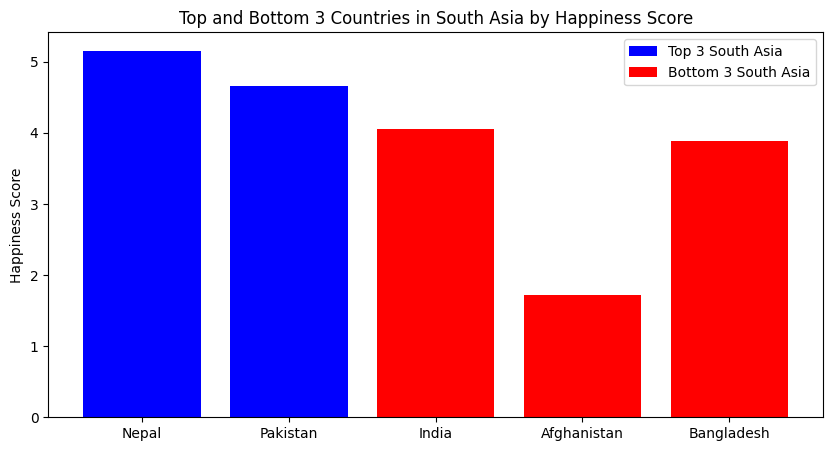

In [114]:
#Bar chart for the top and bottom countires for South Asia
plt.figure(figsize=(10, 5))
plt.bar(top_three_south_asia['Country name'], top_three_south_asia['score'], color='blue', label='Top 3 South Asia')
plt.bar(bottom_three_south_asia['Country name'], bottom_three_south_asia['score'], color='red', label='Bottom 3 South Asia')
plt.title("Top and Bottom 3 Countries in South Asia by Happiness Score")
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

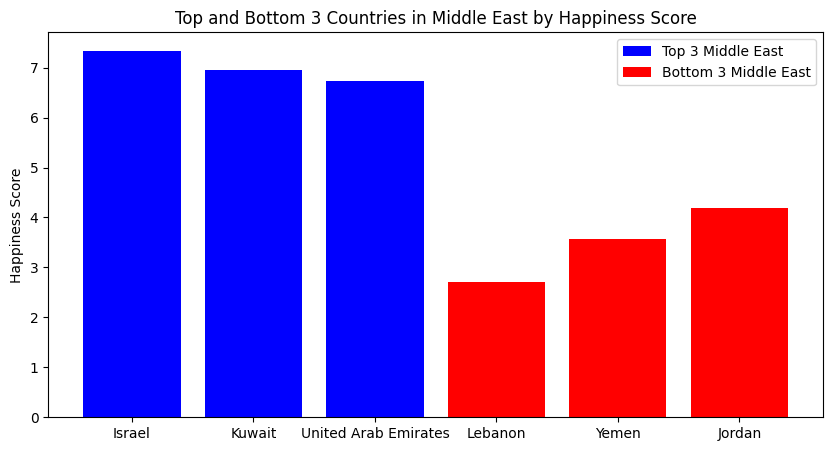

In [40]:
#Bar chart for the top and bottom countires for Middle East
plt.figure(figsize=(10, 5))
plt.bar(top_three_middle_east['Country name'], top_three_middle_east['score'], color='blue', label='Top 3 Middle East')
plt.bar(bottom_three_middle_east['Country name'], bottom_three_middle_east['score'], color='red', label='Bottom 3 Middle East')
plt.title("Top and Bottom 3 Countries in Middle East by Happiness Score")
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

In [69]:
#Metric Comparisons

#Metrics to be used while comparing
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

#Mean of metrics of south asia countries
south_asian_metrics = south_asian_countries_df[metrics].mean()
print("South Asia Metrics:")
south_asian_metrics


South Asia Metrics:


,0
Log GDP per capita,0.9900
Social support,0.4984
Healthy life expectancy,0.3872


In [68]:
#Mean of metrics of middle east countries
middle_east_metrics = middle_east_countries_df[metrics].mean()
print("Middle East Metrics:")
middle_east_metrics

Middle East Metrics:


,0
Log GDP per capita,1.496333
Social support,1.152778
Healthy life expectancy,0.554111


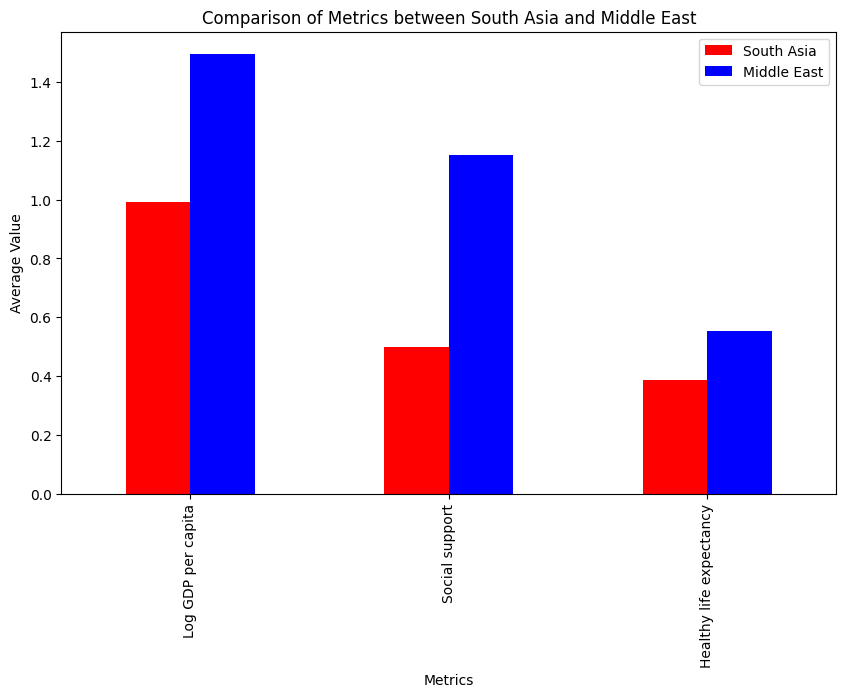

In [42]:
# Combine the data for plotting
comparison_df = pd.DataFrame({'South Asia': south_asian_metrics,'Middle East': middle_east_metrics})

# Plotting the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Comparison of Metrics between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.show()

In [ ]:
#The social support shows the largest disparity.

In [43]:
#Happiness Disparity

#Range for South Asia and Middle East
south_asian_range = south_asian_countries_df['score'].max() - south_asian_countries_df['score'].min()
middle_east_range = middle_east_countries_df['score'].max() - middle_east_countries_df['score'].min()

#Coefficient of Variation (CV) for South Asia and Middle East
south_asian_cv = south_asian_countries_df_score_standard_deviation / south_asian_countries_df_score_mean
middle_east_cv = middle_east_countries_df_score_standard_deviation / middle_east_countries_df_score_mean

print(f"South Asia: Range: {south_asian_range}, CV: {south_asian_cv}")
print(f"Middle East: Range: {middle_east_range}, CV: {middle_east_cv}")




South Asia: Range: 3.4370000000000003, CV: 0.3378523684509764
Middle East: Range: 4.634, CV: 0.28938880812119405


In [44]:
#Finding which region has greater variability in happiness.
if south_asian_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")

South Asia has greater variability in happiness scores.


In [45]:
#Correlation Analysis

# Calculate correlations for South Asia
south_asian_correlation_freedom = south_asian_countries_df['score'].corr(south_asian_countries_df['Freedom to make life choices'])
south_asian_correlation_generosity = south_asian_countries_df['score'].corr(south_asian_countries_df['Generosity'])

# Calculate correlations for Middle East
middle_east_correlation_freedom = middle_east_countries_df['score'].corr(middle_east_countries_df['Freedom to make life choices'])
middle_east_correlation_generosity = middle_east_countries_df['score'].corr(middle_east_countries_df['Generosity'])

print(f"South Asia:\nCorrelation of score with Freedom to Make Life Choices: {south_asian_correlation_freedom}")
print(f"Correlation of score with Generosity: {south_asian_correlation_generosity}")
print("\n")
print(f"Middle East:\nCorrelation of score with Freedom to Make Life Choices: {middle_east_correlation_freedom}")
print(f"Correlation of score with Generosity: {middle_east_correlation_generosity}")


South Asia:
Correlation of score with Freedom to Make Life Choices: 0.801497903141921
Correlation of score with Generosity: 0.8773326267276358


Middle East:
Correlation of score with Freedom to Make Life Choices: 0.8632202433827544
Correlation of score with Generosity: 0.6275236536964182


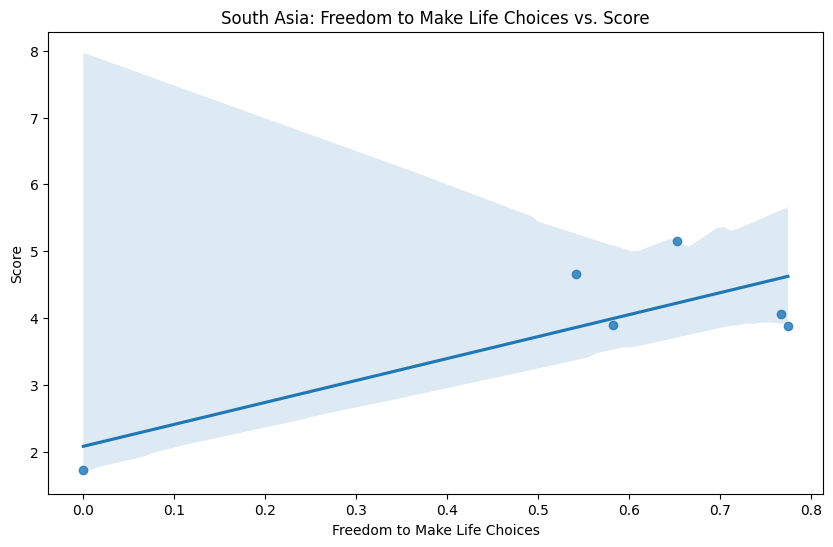

In [105]:
#Scatter plot for correlation of Freedom to Make Life Choices and Score for South asia
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices',y='score',data=south_asian_countries_df)
plt.title("South Asia: Freedom to Make Life Choices vs. Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Score")
plt.show()

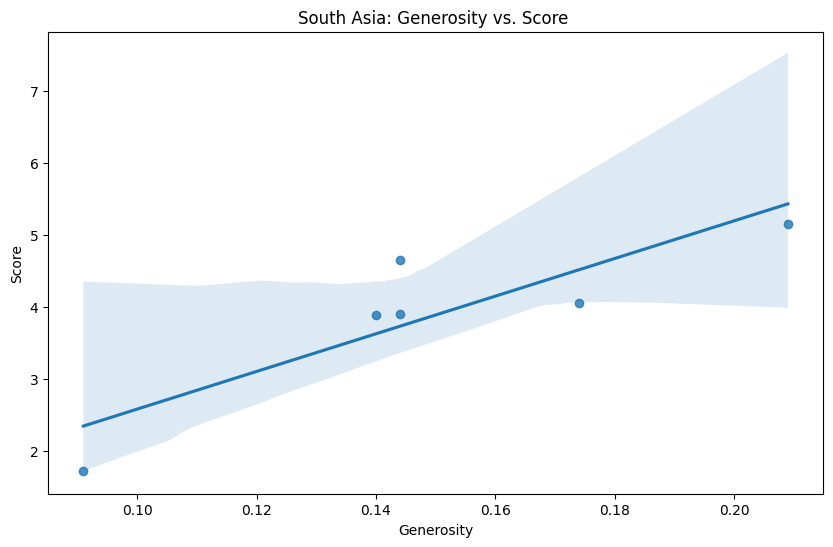

In [104]:
#Scatter plot for correlation of Generosity and Score for South asia
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity',y='score',data=south_asian_countries_df)
plt.title("South Asia: Generosity vs. Score ")
plt.xlabel("Generosity")
plt.ylabel("Score")
plt.show()

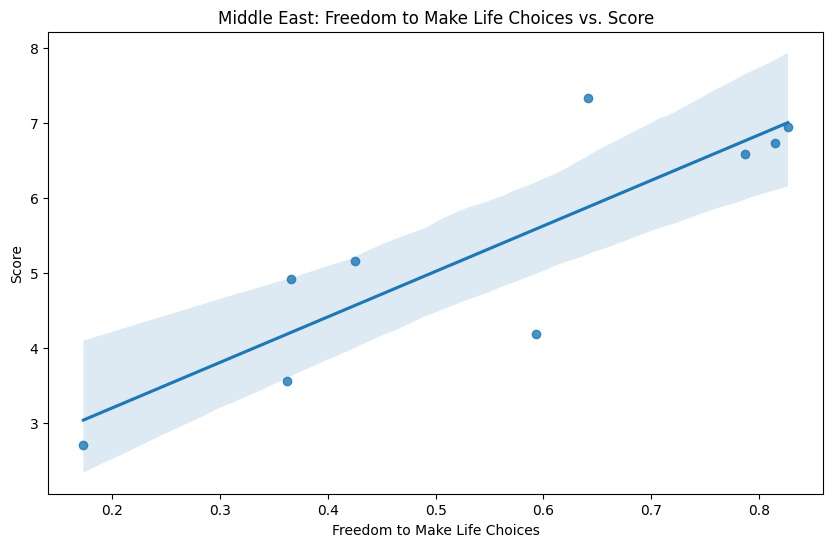

In [101]:
# Scatter plot for correlation of Freedom to Make Life Choices and Score for middle east
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices',y='score',data=middle_east_countries_df)
plt.title("Middle East: Freedom to Make Life Choices vs. Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Score")
plt.show()


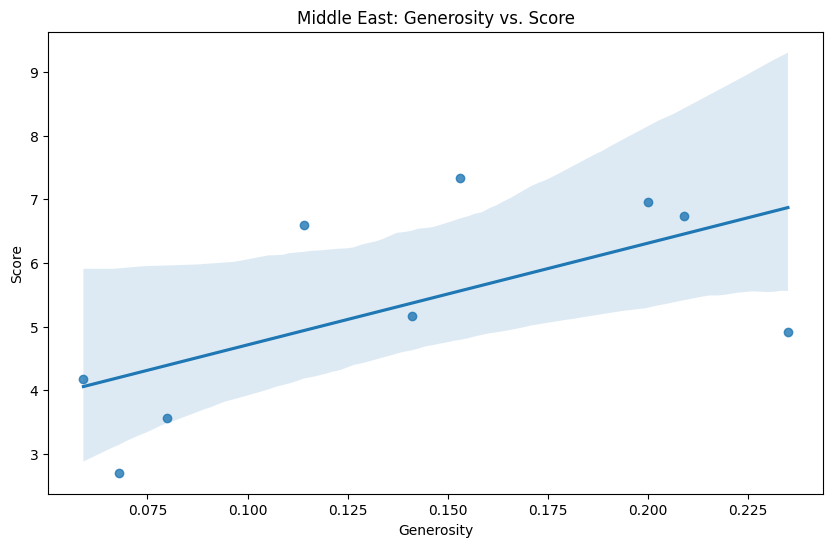

In [102]:
# Scatter plot for correlation of Generosity and Score for Middle east
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity',y='score',data=middle_east_countries_df)
plt.title("Middle East: Generosity vs. Score")
plt.xlabel("Generosity")
plt.ylabel("Score")
plt.show()

In [76]:
#Outlier Dectection

#Function to find outliers using IQR rule
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [93]:
#Finding outliers for Score and GDP in south asia
south_asian_score_outliers = find_outliers(south_asian_countries_df, 'score')
south_asian_gdp_outliers = find_outliers(south_asian_countries_df, 'Log GDP per capita')
print("Outliers for Score in South Asia:")
print(south_asian_score_outliers[['Country name', 'score','Log GDP per capita']])


Outliers for Score in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [94]:
#Finding outliers for Score and GDP in middle east
middle_east_score_outliers = find_outliers(middle_east_countries_df, 'score')
middle_east_gdp_outliers = find_outliers(middle_east_countries_df, 'Log GDP per capita')
print("Outliers for Score in Middle East:")
print(middle_east_score_outliers[['Country name', 'score','Log GDP per capita']])


Outliers for Score in Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


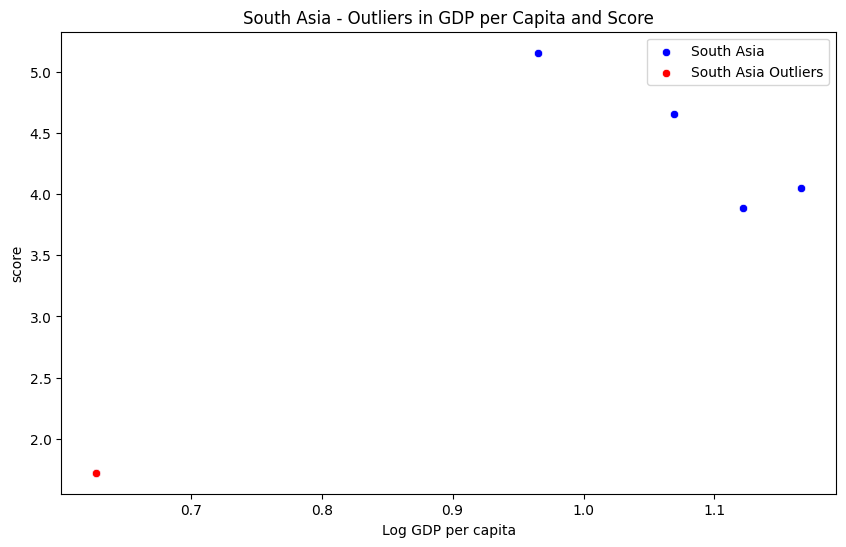

In [72]:
#Plotting the outliers for south asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_countries_df, color='blue', label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_score_outliers, color='red', label='South Asia Outliers')
plt.title('South Asia - Outliers in GDP per Capita and Score')
plt.show()

In [ ]:
#Looking at the scatter plot above we can determine that south asia has a outlier Afganistan
#This means that Afganistan has some extreme values in our data that can skew our avergae of south asian countires

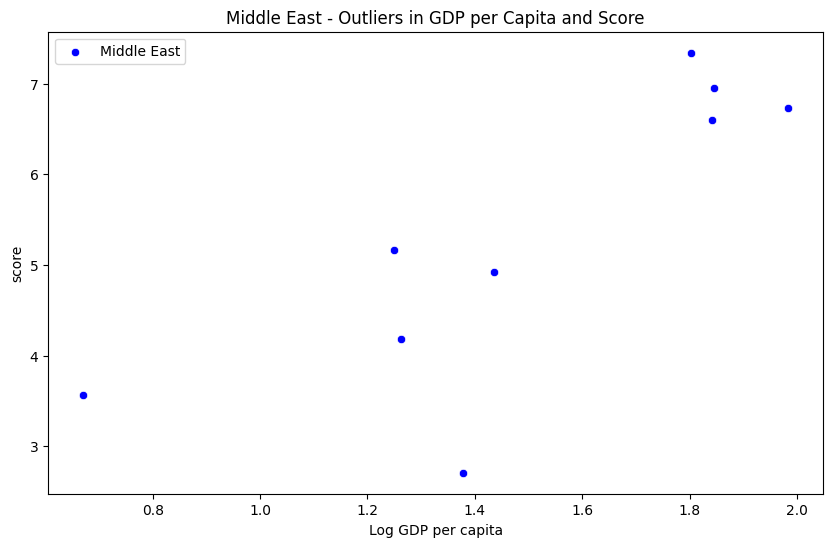

In [95]:
#Plotting the outluiers for middle east
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_countries_df, color='blue', label='Middle East')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_score_outliers, color='red', label='Middle East Outliers')
plt.title('Middle East - Outliers in GDP per Capita and Score')
plt.show()

In [ ]:
#Looking at the scatter plot we can determine that there are no outliers in middle east
#This means that there are no extreme values in our data that can skwe the average of middle east countries

Text(0, 0.5, 'Score')

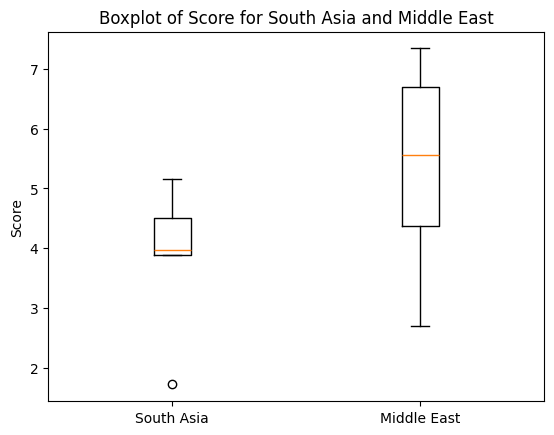

In [97]:
#Visualization

plt.boxplot([south_asian_countries_df['score'], middle_east_countries_df['score']],labels = ['South Asia','Middle East'])
plt.title('Boxplot of Score for South Asia and Middle East')
plt.ylabel('Score')


In [ ]:
#From the box plot we can see the distribution shapes,medians and outliers